In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

Prepare the Data for Regression Through Exploratory Data Analysis

The EDA refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Using the EDA process you will walk through every nook and cranny of the vast terrain of your data. You will meet with each dimension of the data and will pick the ones that could be useful to discover hidden patterns. This is a pre-ML step. You will touch the data, feel its sensitivity and retain only the parts that has meaningful information to reveal.

This notebook walks you through some essential steps of EDA. Ref :https://github.com/rhasanbd/Data-Scientist-s-Handbook-1/blob/master/Data%20Scientist's%20Handbook-I.ipynb

1. Load Data

In [6]:
import pandas as  pd
df1 = pd.read_csv("Bengaluru_House_Data.csv")

2. Quick check of data

In [7]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
df1.shape

(13320, 9)

In [14]:
#Dimension of Data

print("Dimension of the data: ", df1.shape)

no_of_rows = df1.shape[0]
no_of_columns = df1.shape[1]

print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

Dimension of the data:  (13320, 9)
No. of Rows: 13320
No. of Columns: 9


3. Description of data df.info()

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


4. Visualization of Data
We can plot histogram for each numerical attribute.

array([[<AxesSubplot:title={'center':'bath'}>,
        <AxesSubplot:title={'center':'balcony'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

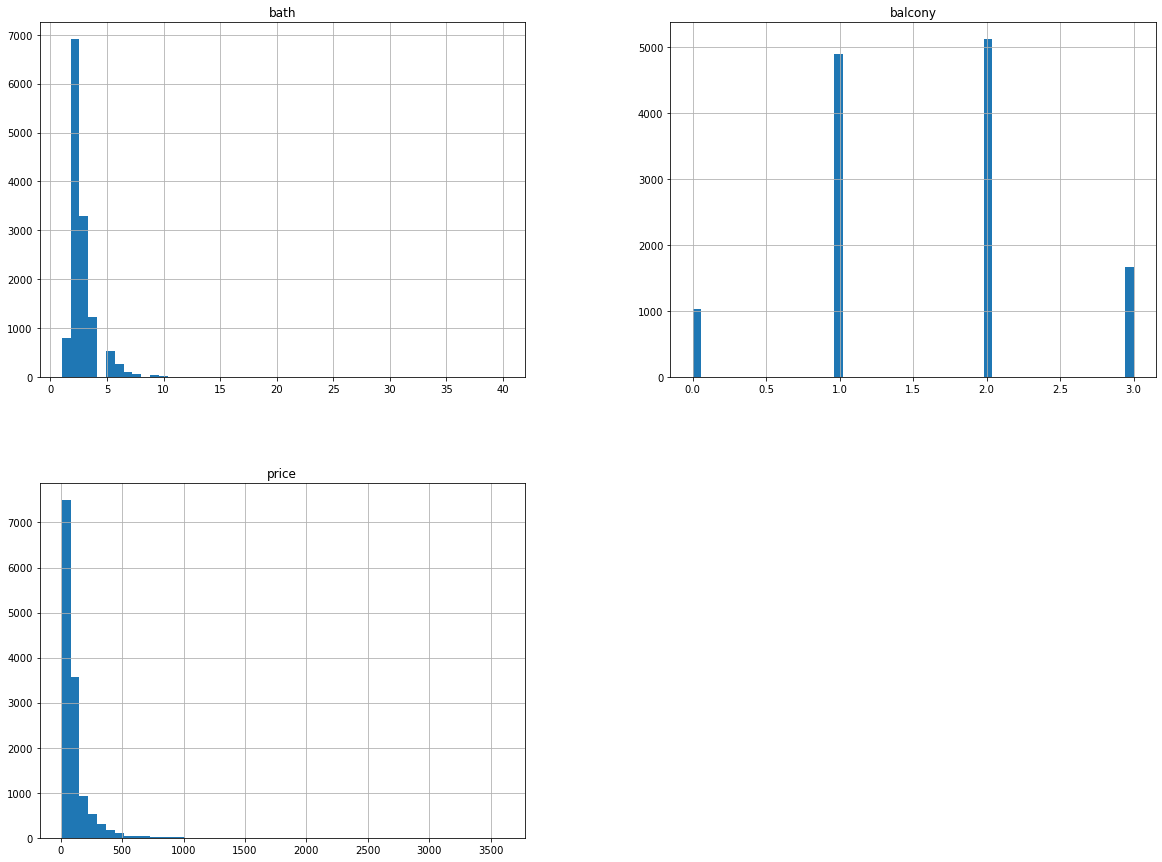

In [16]:
df1.hist(bins=50, figsize=(20,15)) 

Here, we can infer that  balcony does not have any influence in prices.

<AxesSubplot:>

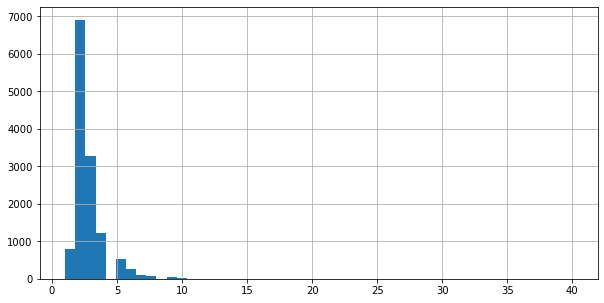

In [18]:
df1['bath'].hist(bins=50, figsize=(10,5)) 

5. Explore the data
In order to explore data we have to 
* Describe columns with numerical attributes
* Describe columns with numerical aatributes
* Explore Columns
* Check the invalid Values in a column


In [19]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [22]:
#Describe column with cattegorical value
# Value Counts for Categorical Columns

# Print the value counts for categorical columns
for col in df1.columns:
    if df1[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df1[col].value_counts())



Column Name: area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

Column Name: availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

Column Name: location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

Column Name: size
2 

In [26]:
df1["price"]

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13320, dtype: float64

In [27]:
#check the number of os in target column
count = 0

def zeroCount(dataFrame, columnName):
    noOfZeros = 0
    for i in range(dataFrame.shape[0]):
        if dataFrame[columnName][i] == 0:
            noOfZeros = noOfZeros + 1
    return noOfZeros

count = zeroCount(df1, 'price')

print("Number of 0s in the Target Column: %d" % count)

Number of 0s in the Target Column: 0


In [9]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [10]:
#this time we are dropping these columns but not always
df2 = df1.drop(["area_type","society","balcony","availability"],axis ="columns")

6. Data Cleaning
We need to clean the missing features, otherwise the ML algorithms won’t work. By "missing" we simply mean NA ("not available") or "not present for whatever reason". Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed. The NaN is the default missing value marker.

There are three techniques to clean data:

* Drop the "NA" Missing Feature Values
* Drop the "Non-NA" Missing Feature Values
* Replce the Missing Feature Values
* Drop the "NA" Missing Feature Values
We exclude labels from a data set which refer to missing data (NA).

To do this, we use DataFrame's dropna() and drop() methods.

8(b). Drop the "Non-NA" Missing Feature Values
Sometimes we consider some values (other than NA) as "missing" values.

For example, the value "0" in the target column is considered as a missing value. 


In [28]:
df1 = df1[~df1['price'].isin([0])]

* To replace an empty cell with zero values, we will use DataFrame’s fillna() method.

The fillna() method can "fill in" NA (Not Available) or missing values with non-NA data in a couple of ways.

For example, we can fill in the empty cells with 0 values: df["price"] = df["price"].fillna(0)

Or, we can fill in the empty cells with median values: median = df["price"].median() df["price"] = df["price"].fillna(median, inplace=True)

Since, there were no empty cells in the target column, we don't have to use the fillna() method. But it's a very useful tool to have in your toolbox for data cleaning.

In [29]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [30]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [31]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [33]:
df3["bhk"] = df3["size"].apply(lambda x:int(x.split(" ")[0]))

C:\Users\poude\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [35]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [36]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [37]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [38]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [42]:
df3[~df3["total_sqft"].apply(is_float)].tail(50)

,location,size,total_sqft,bath,price,bhk
9734,Yelahanka New Town,1 BHK,45.06Sq. Meter,2.0,18.000,1
9736,Pragathi Nagar,1 BHK,799 - 803,1.0,33.645,1
9814,Hebbal,4 BHK,2470 - 2790,5.0,188.000,4
9853,Hoodi,1 BHK,783 - 943,1.0,40.550,1
10050,Old Madras Road,5 BHK,4500 - 5540,7.0,287.000,5
10257,Hulimavu,2 BHK,1255 - 1375,2.0,60.480,2
10351,Jalahalli,1 BHK,610 - 615,1.0,27.565,1
10439,ITPL,2 BHK,854 - 960,2.0,55.430,2
10467,Harlur,4 BHK,2650 - 2990,4.0,153.500,4
10488,2 Bedroom Furnished Farm House in Kolar Road,2 Bedroom,1.25Acres,2.0,200.000,2


In [46]:
#we have to tackle the range function. we are not going to change square inch and other metrics to squareft

def convert_strtonum(x):
    tokens = x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [47]:
convert_strtonum('1400-1421')

1410.5

In [48]:
#if we want to split and make use of data with sq yards and all
# import re
# s='abcd2343 abw34324 abc3243-23A'
# re.split('(\d+)',s)

In [49]:
df4 = df3.copy()
df4["total_sqft"] =df4["total_sqft"].apply(convert_strtonum)

In [50]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [51]:
df4.loc[12435]

location      Banashankari Stage VI
size                          3 BHK
total_sqft                   1410.5
bath                            2.0
price                        70.385
bhk                               3
Name: 12435, dtype: object

Now here we start feature Engineering and dimensionality reduction

In [52]:
#creating price per sqft column will help us locate the outlier 
df5 = df4.copy()
df5["price_per_sqft"]= df5["price"]*100000/df5["total_sqft"]
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [53]:
#check how many locations we have 
len(df5.location.unique())

1304

In [ ]:
# Since unique locations are 1305, one hot encoding would give lots of dimensions for eg, 1304 here. 
# So we have to reduce the dimension.
#So for dimensionality reduction, lets find out how many data points are available for
#each unique value.

In [54]:
#remove leading space
df5.location = df5.location.apply(lambda x:x.strip())

In [55]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [60]:
locations_stats = df5.groupby("location")["location"].agg("count")

In [62]:
locations_stats.sort_values(ascending =False)


location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [63]:
len(locations_stats[locations_stats<=10])

1052

In [64]:
locations_statsless_than10 = locations_stats[locations_stats<=10]

In [68]:
df5.location =df5.location.apply(lambda x:"other" if x in locations_statsless_than10 else x  )

In [69]:
len(df5.location.unique())

242

## Outlier Detection and Removal ##

For outlier detection we use domain knowledge and statistical methods . Use different techniques like std deviation

In [70]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Here, we have to go to subject matter expert and ask about different aspects , If 300 sqft is a typical for bedroom ,
we can find out hte properties where the threshold doesnot match

In [72]:
df5[df5.total_sqft/df5.bhk<300].head(20)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [77]:
len(df5[(df5.total_sqft/df5.bhk<300)])

SyntaxError: invalid syntax (<ipython-input-77-352dabb362b8>, line 1)

In [78]:
#if we want to filter all these rows, 
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [79]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [81]:
df6.shape

(12502, 7)

In [82]:
#write a function based on std deviation .Since we are making a generic model . 
#we have to do it per location as location would be direcly related to cost
def remove_outliers_std(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby("location"):
        mean_p = np.mean(subdf.price_per_sqft)
        std_p = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean_p-std_p)) &(subdf.price_per_sqft<=(mean_p+std_p))] 
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_outliers_std(df6)
df7.shape

    


(10241, 7)

In [92]:
df7.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

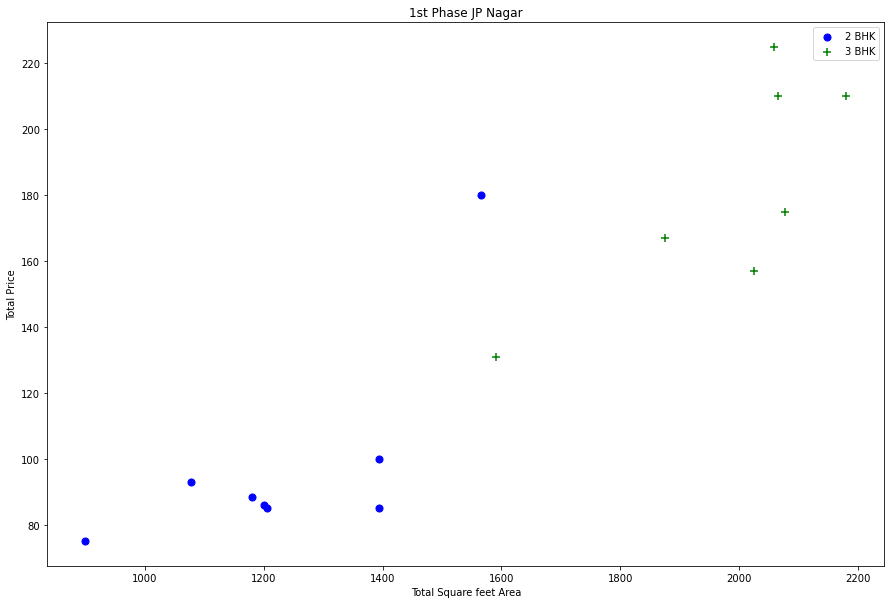

In [88]:
# this function takes location and dataframe as an input .
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location ==location) & (df.bhk==2)]
    bhk3 = df[(df.location ==location) & (df.bhk==3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue", label ="2 BHK",s =50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker="+",color = 'green', label ="3 BHK",s =50)
    plt.xlabel("Total Square feet Area")
    plt.ylabel("Total Price")
    plt.title(location)
    plt.legend()
  
plot_scatter_chart(df7,"1st Phase JP Nagar")




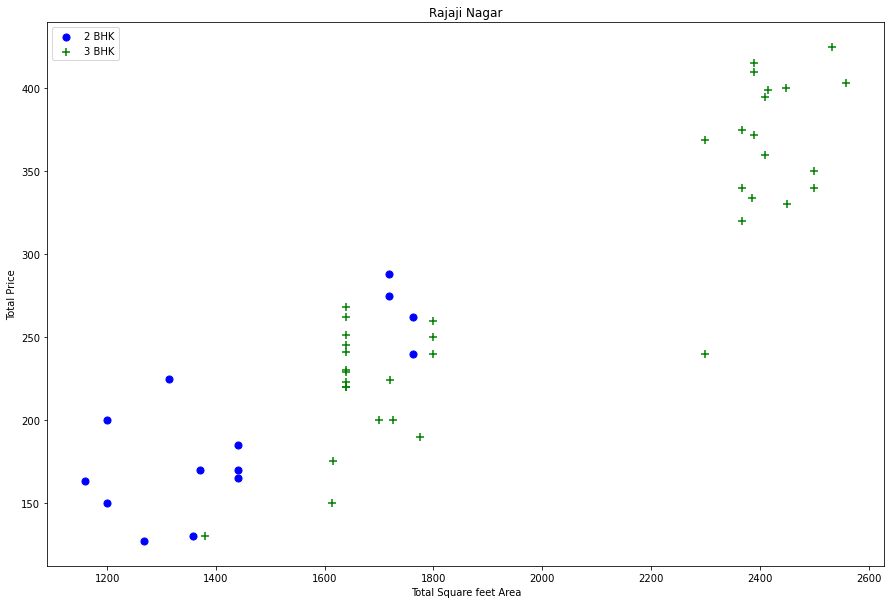

In [89]:
plot_scatter_chart(df7,"Rajaji Nagar")

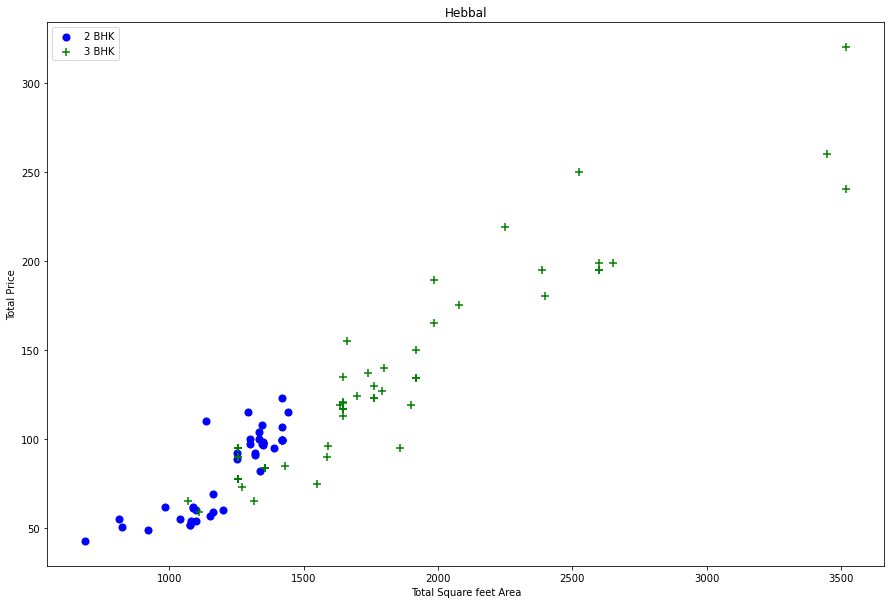

In [93]:
plot_scatter_chart(df7,"Hebbal")

As can be seen from the visualisations, there are some apartments which though have same location and with same sq ft area, 3 bedroom apartment is less than 2 bedroom appartment.
We will for that location build a  dictionary of stats per bhk. 

In [94]:
def remove_bhk_outliers(df):
    no_indices = np.array([])
    for location,location_df in df.groupby("location"):
        bhk_stats ={}
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]={
                "mean" :np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby("bhk"): 
            stats = bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                no_indices = np.append(no_indices,bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(no_indices,axis="index")            

In [95]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

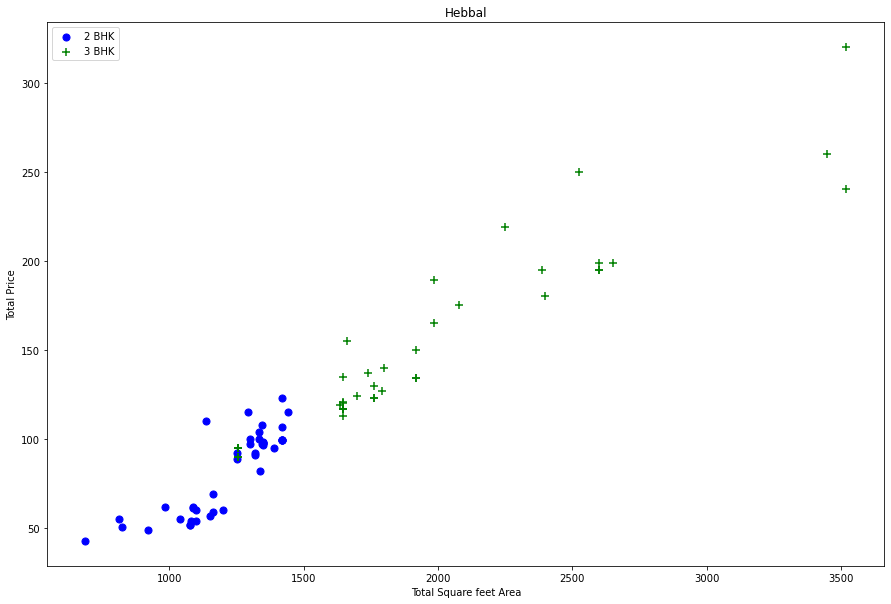

In [99]:
plot_scatter_chart(df8,"Hebbal")

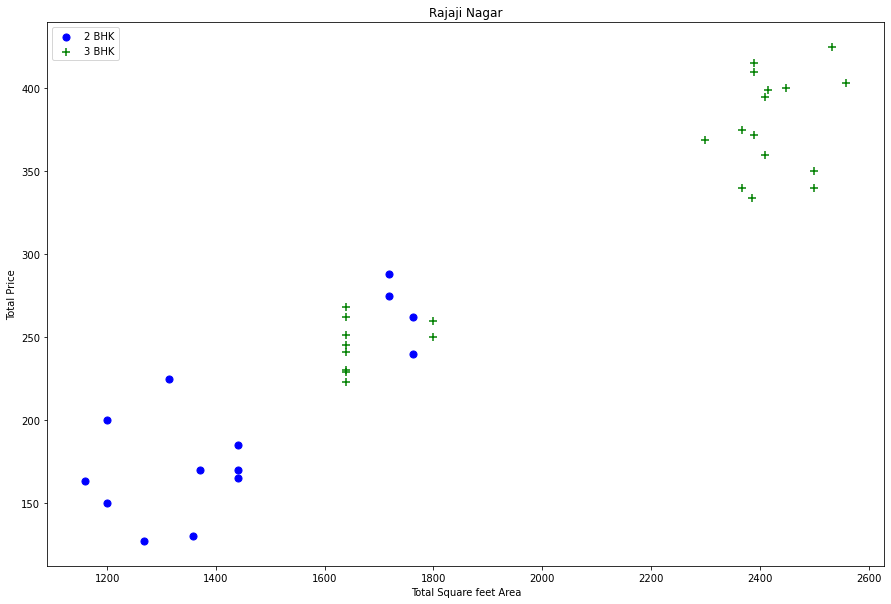

In [98]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

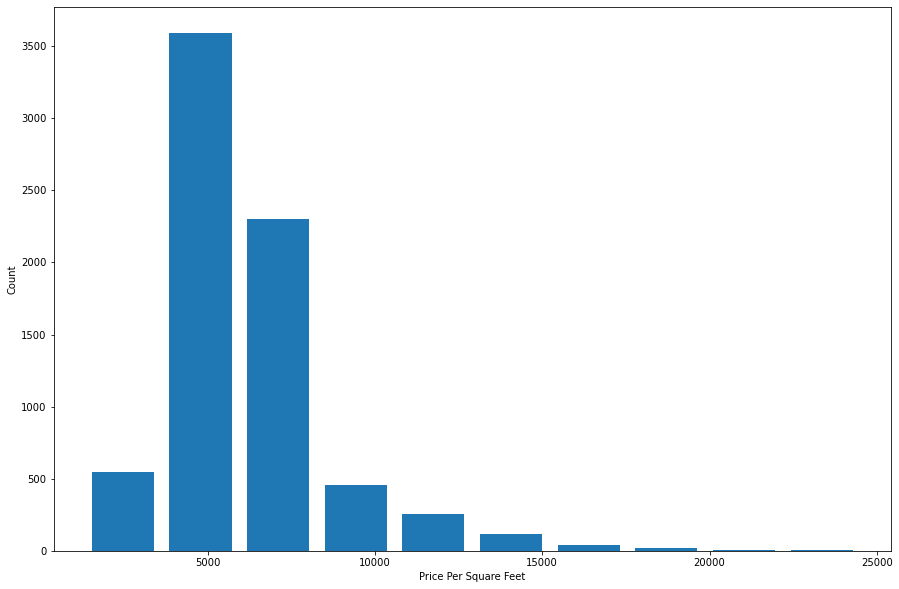

In [100]:
matplotlib.rcParams["figure.figsize"] = (15,10)
plt.hist(df8.price_per_sqft,rwidth =0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
      

In [101]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [102]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

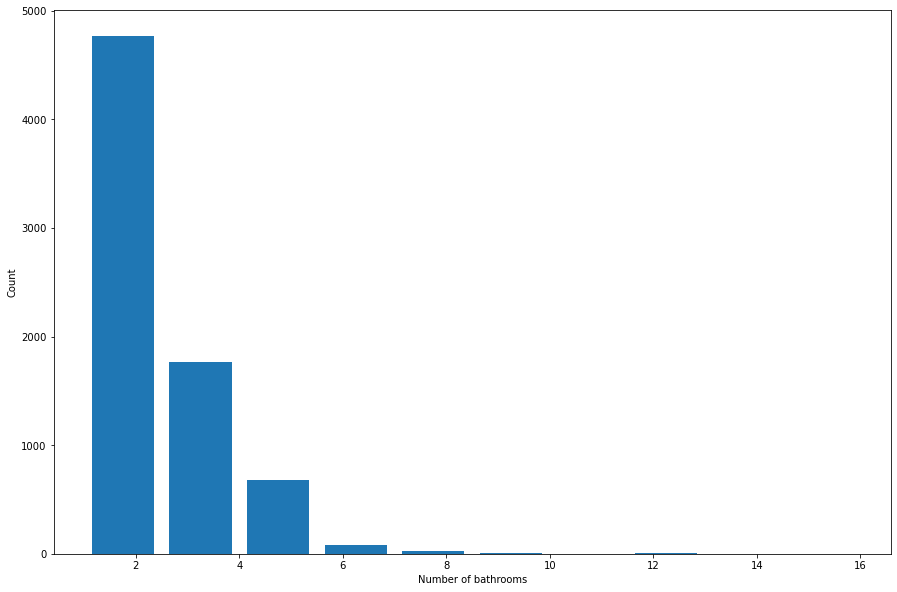

In [103]:
matplotlib.rcParams["figure.figsize"] = (15,10)
plt.hist(df8.bath,rwidth =0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [105]:
# if we have bathrooms greater than bedrooms plus 2 , we have to treat it as outlier

df9 = df8[df8.bath <= df8.bhk+2]
df9.shape

(7325, 7)

In [106]:
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [107]:
# so here, we can drop price_per_sqft 
# which we created for outlier detection and size as we have bhk in lie of that. df10 = 
df10 = df9.drop(["size","price_per_sqft"],axis ="columns")
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## Modal Building ##

In [109]:
#location should be converted . So one hot encoding is applied.

one_hot= pd.get_dummies(df10.location)
one_hot.head()


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
#to avoid a dummy variable trap, we can drop a column, we are dropping the last column other 
df11 = pd.concat([df10,one_hot.drop("other",axis ="columns")],axis ="columns")

In [112]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
df12 = df11.drop(["location"],axis ="columns")

In [115]:
df2.shape

(13320, 5)

In [116]:
X = df12.drop(["price"],axis ="columns")
X.shape

(7325, 244)

In [117]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [118]:
#split train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =10)


In [119]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.8017674308563397

In [120]:
#we are going to use k fold cross validation 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size = 0.2,random_state = 0)
cross_val_score(LinearRegression(),X,y,cv =cv)

array([0.85435491, 0.83563607, 0.82369758, 0.84409753, 0.81649097])

In [126]:
#let us try other regression algorithms and figure out which gives us best, Method called grid search cv.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    algos ={
        "linear_regression":{
        "model": LinearRegression(),
        "params":{
            "normalize":[True,False]
        }
    },
        "lasso":{
            "model":Lasso(),
            "params": {
                "alpha":[1,2],
                "selection":["random","cyclic"]
                
            }
        },
        "decision_tree":{
            "model": DecisionTreeRegressor(),
            "params":{
                "criterion":["mse","friedman_mse"],
                "splitter" :["best","random"]
            }
        }
    }
    scores =[]
    cv = ShuffleSplit(n_splits =5,test_size =0.2,random_state =0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config["model"],config["params"],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            "model":algo_name,
            "best_score":gs.best_score_,
            "best_params":gs.best_params_
        })
        
    return pd.DataFrame(scores,columns =["model","best_score","best_params"])   
        


find_best_model(X,y)

C:\Users\poude\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\poude\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.834855,{'normalize': True}
1,lasso,0.684360,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.743640,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [128]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [129]:
np.where(X.columns =='Vijayanagar')[0][0]


234

In [130]:
def predict_price (location,sqft,bath,bhk):
    loc_index = np.where(X.columns ==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] =sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index]=1
    return lr_clf.predict([x])[0]    

    

In [131]:
predict_price('Vishveshwarya Layout',1000,2,2)

C:\Users\poude\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


28.437555507099546

In [132]:
predict_price('Indira Nagar',1000,2,2)

C:\Users\poude\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


183.84324442031277

In [133]:
predict_price('Indira Nagar',1000,2,3)

C:\Users\poude\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


177.53203999144813

In [134]:
predict_price('Indira Nagar',1000,3,2)

C:\Users\poude\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


185.07634940931803

In [135]:
#Now we are exporting all artifacts that is needed by python flask.

import pickle
with open("home_prices_model_india.pickle","wb") as f :
    pickle.dump(lr_clf,f)


In [136]:
#other than model, we need column 
import json
columns = {
    "data_columns":[col.lower() for col in X.columns]
}
with open ("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
#now python flask server used as backend for UI application. 